Exploratory Data Analysis (EDA)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('sales_data_sample.csv',encoding='latin1')

In [8]:
# Preview the dataset
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
# Check for missing values
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
# Remove Columns with Any Null Values
# To remove columns with even a single NaN:

data = data.dropna(axis=1, how='any')

In [12]:
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [74]:
# Convert 'ORDERDATE' to Datetime Format

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [75]:
# Extract Year and Month

data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month

In [77]:
# Aggregate Revenue

revenue_trends = data.groupby(['Year', 'Month'])['SALES'].sum().reset_index()

In [78]:
revenue_trends

,Year,Month,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


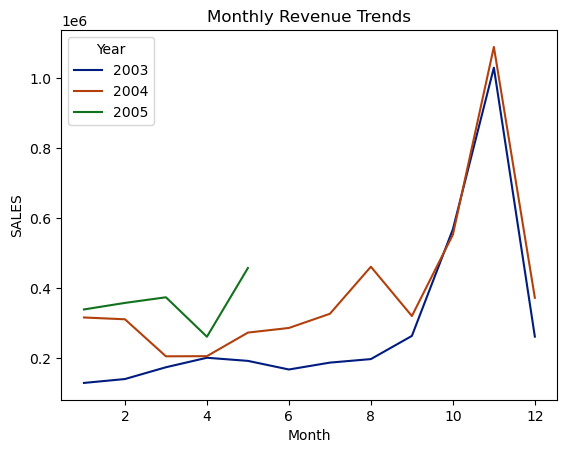

In [79]:
# Plot revenue trends

sns.lineplot(data=revenue_trends,x='Month',y='SALES',hue='Year',palette='dark')
plt.title('Monthly Revenue Trends')
plt.show()

In [28]:
# Revenue by product line

product_line_revenue = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).reset_index()

In [29]:
product_line_revenue

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


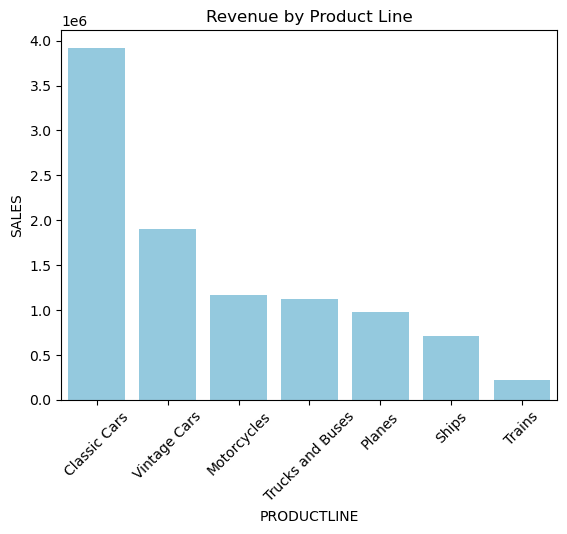

In [30]:
# Plot revenue by product line

sns.barplot(data=product_line_revenue,x='PRODUCTLINE',y='SALES',color='skyblue')
plt.title('Revenue by Product Line')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Top 10 customers by revenue

top_customers=data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()

In [32]:
top_customers

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
5,"Dragon Souveniers, Ltd.",172989.68
6,Land of Toys Inc.,164069.44
7,The Sharp Gifts Warehouse,160010.27
8,"AV Stores, Co.",157807.81
9,"Anna's Decorations, Ltd",153996.13


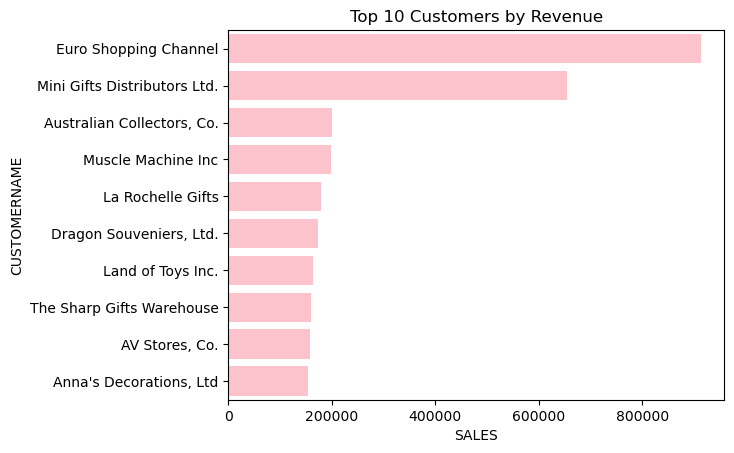

In [51]:
# Plot top customers

sns.barplot(data=top_customers_df,x='SALES',y='CUSTOMERNAME',color='pink',saturation=0.9)
plt.title('Top 10 Customers by Revenue')
plt.show()

In [52]:
# Revenue by country

country_revenue=data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

In [53]:
country_revenue

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


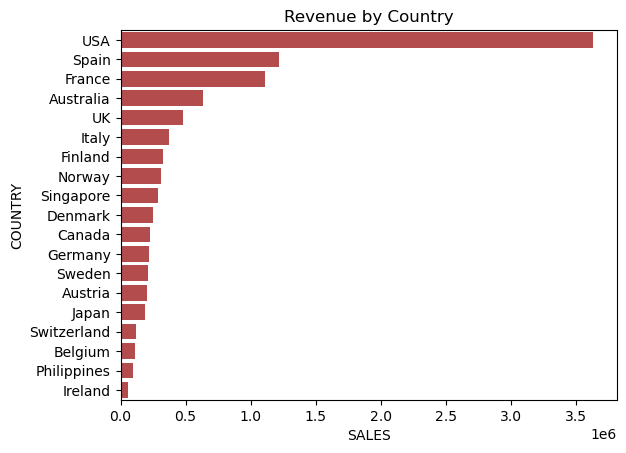

In [68]:
# Plot revenue by country
sns.barplot(data=country_revenue,x='SALES',y='COUNTRY',color='red',saturation=0.4)
plt.title('Revenue by Country')
plt.show()